

# Project: TMDb Movie Data Analysis



## Introduction
### We will analyze data for the last ten years and we are going to answer thies questions:
#### 1-what movie genre has the most popularity in the last ten year?
#### 2-What is the rate of budget per genre in the last ten years?
#### 3-Is there a relationship between popularity and average vote?
#### 4-Which genre has the highest number of movies generated in the last five years?



In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [19]:
# Load my data and print out a few lines.
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [21]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [22]:
#check for missing data
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [23]:
#check for duplicate data
df.duplicated().sum()

1

## Cleaning Data 
### drop unuseful columns, missing data, and duplicate data



In [24]:
# drop columns that don't give me important information for helping me in  my analysis 
d_list=['imdb_id','homepage','cast','keywords','tagline','production_companies'
        ,'overview','release_date','budget_adj','revenue_adj']
df.drop(d_list,axis=1,inplace=True)

In [25]:
#replace 0 by null
df['revenue']=df['revenue'].replace(0,np.nan)
df['budget']=df['budget'].replace(0,np.nan)

In [26]:
#split genre string to the primary genre
df["genres"]= df["genres"].str.split("|",expand=True) 

In [27]:
#drop missing data and check
df.dropna(inplace=True)
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [28]:
#drop duplicated data and check
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 11 columns):
id                3853 non-null int64
popularity        3853 non-null float64
budget            3853 non-null float64
revenue           3853 non-null float64
original_title    3853 non-null object
director          3853 non-null object
runtime           3853 non-null int64
genres            3853 non-null object
vote_count        3853 non-null int64
vote_average      3853 non-null float64
release_year      3853 non-null int64
dtypes: float64(4), int64(4), object(3)
memory usage: 361.2+ KB


  <a id='eda'></a>
 ### I was pulling data for the last ten year and store it in "df_last_10_year" variable

In [30]:
 df_last_10_year=df.query('release_year>=2005')

<a id='eda'></a>
## Exploratory Data Analysis


###  Question 1 : what movie genre has the most popularity in the last ten year?

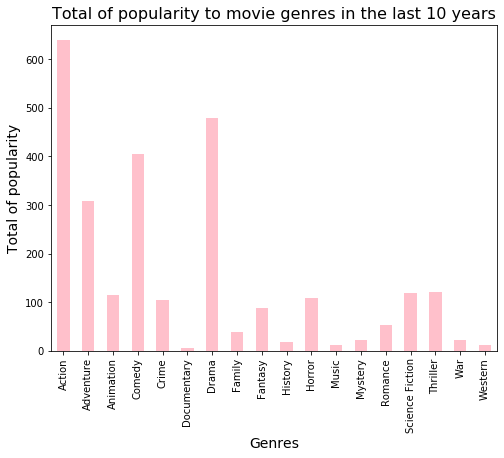

In [31]:
pop_chart=df_last_10_year.groupby('genres').popularity.sum()
pop_chart.plot(kind='bar',color='pink',figsize=(8,6))
plt.title('Total of popularity to movie genres in the last 10 years',fontsize=16)
plt.xlabel("Genres",fontsize=14)
plt.ylabel("Total of popularity",fontsize=14);

<a id='eda'></a>
### From the above bar chart, we can notice that action movies have the most popularity (639.41) in the last ten years followed by drama movies (479.36). while the musician movies have the least popularity (12.68). 

###  Question 2 : What is the rate of budget per genre in the last ten years?

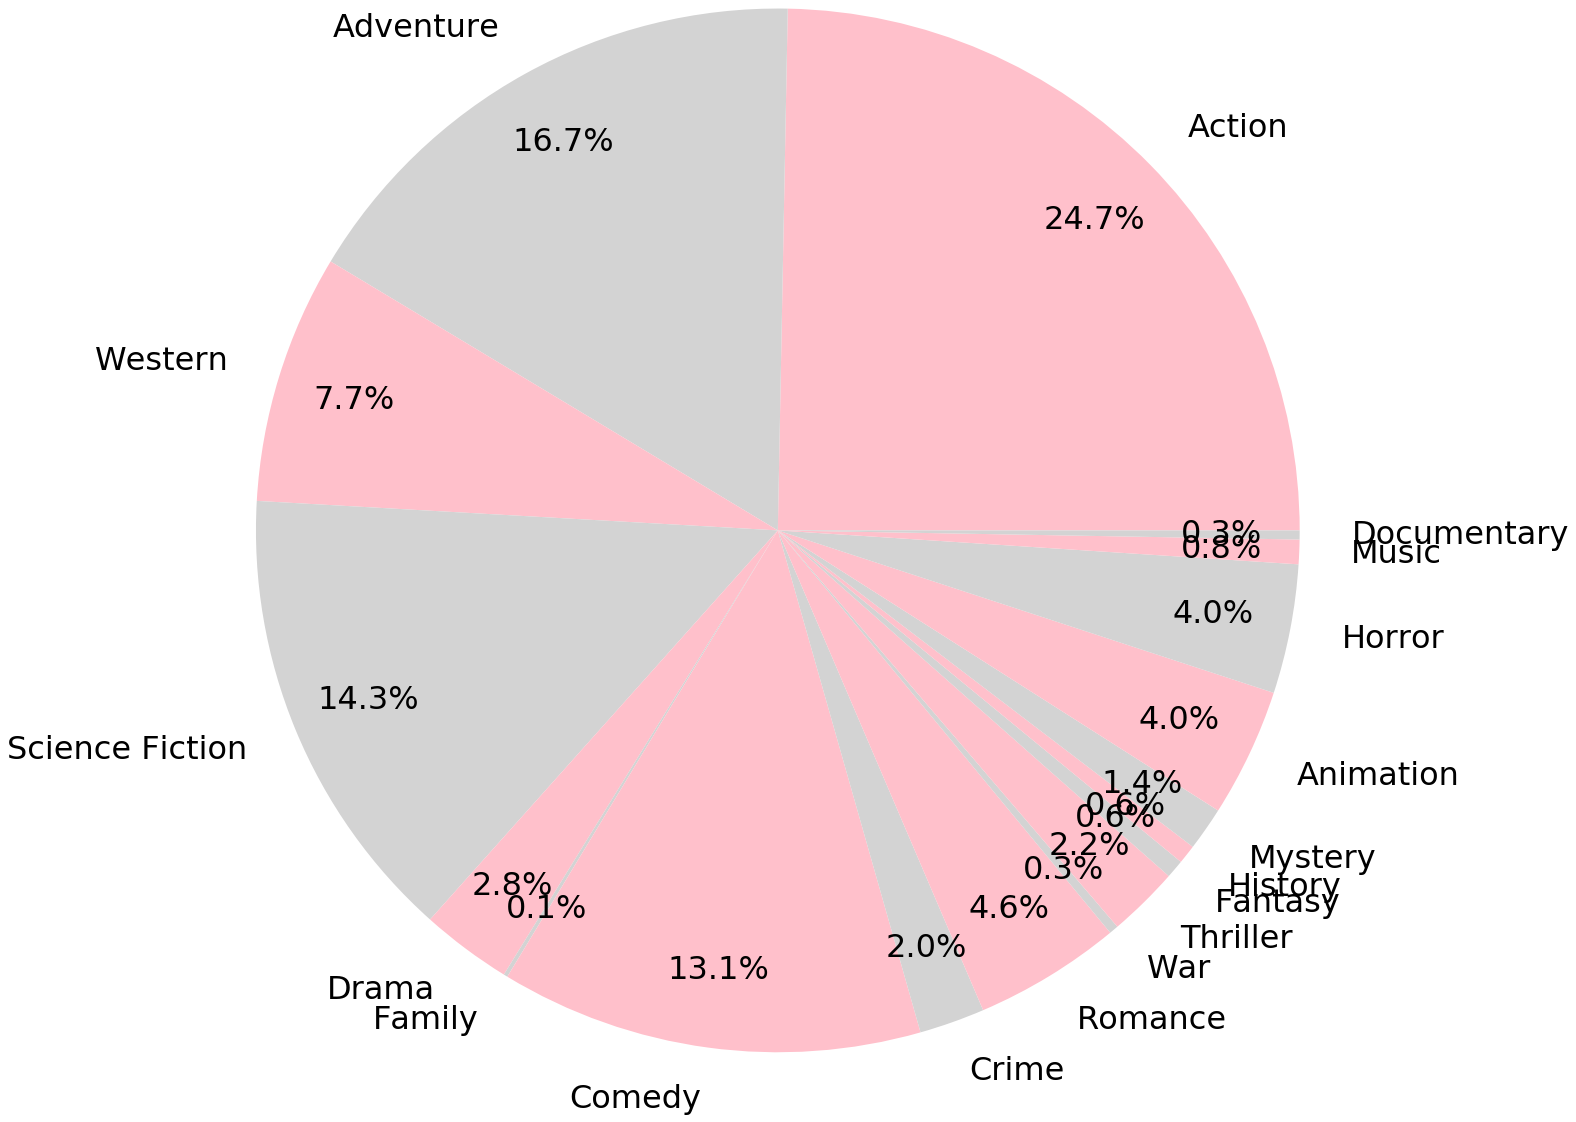

In [23]:
bud_p_gen=df_last_10_year.groupby('genres').budget.sum()
labels_list=df_last_10_year.genres.unique()
color=['pink','lightgray']
plt.pie(bud_p_gen,radius=6,labels=labels_list,colors=color,autopct='%1.1f%%',
        pctdistance=0.85,textprops={'fontsize': 32});


### From the pie chart, we know that Action movies have the most budget rate  (which is 24,7%) and the Adventure movies are the second most budget rate  (which is 16.7%) in the last ten year.

###  Question 3: Is there a relationship between popularity and average vote?

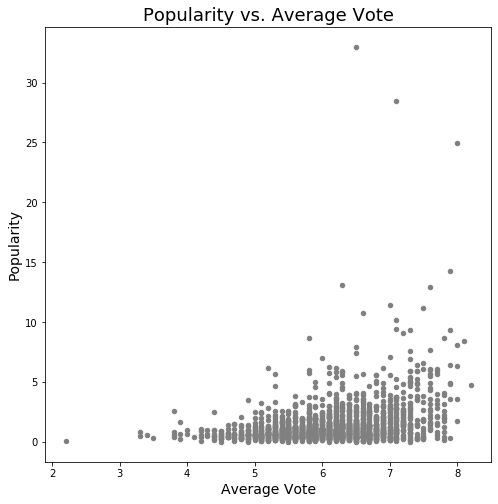

In [24]:
df_last_10_year.plot(kind='scatter',x='vote_average',y="popularity",
                     color='gray',figsize=(8,8));

plt.title("Popularity vs. Average Vote",fontsize=18)
plt.xlabel("Average Vote",fontsize=14)
plt.ylabel("Popularity",fontsize=14);


### The scatter plot shows that Highly popular movies do not necessarily have a high average vote, low-popular movies may also have a high average vote.

  <a id='eda'></a>
 ### Here, I was pulling data for the last five year and store it in "df_last_5_year" variable 

In [25]:
 df_last_5_year=df.query('release_year>=2010')


###  Question 4 : Which genre has the highest number of movies generated in the last five years?

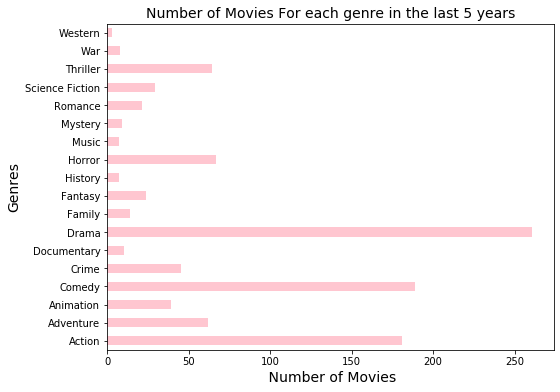

In [26]:

num_mov=df_last_5_year.groupby("genres").id.count()
num_mov.plot(kind="barh",color='pink',alpha=0.9,figsize=(8,6));
plt.title("Number of Movies For each genre in the last 5 years",fontsize=14)
plt.xlabel(" Number of Movies",fontsize=14)
plt.ylabel("Genres",fontsize=14);

<a id='eda'></a>
### In the last 5 years, the most movies generated is Drama movies (261 movies exactly) on the other hand the Western movies are the lowest genres Movies generated which generated just  3 movies 

## Limitations
### The dataset contains missing and duplicates data. so I had to clean data before start answering my questions. Also, I needed to split the genres column to indicate the primary genre.

<a id='conclusions'></a>
## Conclusions
#### 1- In the last ten year, action movies have the most popularity.
#### 2- In the last ten year, action movies have the highest rate of budget.
#### 3-Horror and animation movies have the same rate of budget.
#### 4-The relationship between average votes and popularity is not directly proportional.
#### 5-Drama movies have the  highest number of generated movies In the last five years.




In [27]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295